###Plotting Functions Below

In [12]:
def colorMap(vector):
    norm=cm.colors.Normalize(vmin=-20, vmax=20)
    cmap = cm.prism
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    return m.to_rgba(vector)

def plotPoints(PointsImmutable):
    fig = plt.figure(figsize=(20,20)) #adjust scale
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    map(lambda i: plt.scatter(PointsImmutable[i][0], PointsImmutable[i][1], zs=PointsImmutable[i][2]),\
    range(len(PointsImmutable)))
    plt.show()

def plotClusters(clusters, centers):
    fig = plt.figure(figsize=(20,10)) #adjust scale
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    map(lambda i: plt.scatter(clusters[i][0][0], clusters[i][0][1], zs=clusters[i][0][2],\
                        color=colorMap(clusters[i][1][2]), label=clusters[i][1][2]), range(len(clusters)))
    map(lambda i: plt.scatter(centers[i][0], centers[i][1], zs=centers[i][2],\
                        color="gray"), range(len(centers)))
    plt.show()
    print("These are the found centers, colored in gray: " , centers)
    
def dataOutput(PointsImmutable, clusters, centers):
    #plotPoints(PointsImmutable) #Not necessary afterall.
    plotClusters(clusters, centers)
    #prettyPrint(clusters)                #List Point-Clusters

##$k$-Center Clustering Greedy Algorithm Begins Below

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import math
import numpy as np
import random
import copy
from __future__ import print_function
%matplotlib inline

def kCenters(k, points):
    centers=[]
    random.shuffle(points) #Taking first random center
    centers.append(points.pop()) #Point removed so we don't loop between the two farthest points
    k-=1 
    
    while k>0: 
        k-=1
        centers.append(retFarthestPoint(centers[-1], points))
    return centers

def randomArr3d(upper, lower, n):
    return np.round((np.random.rand(n,3)*(upper-lower))+lower)

def threeDNorm(point1,point2):
    return math.sqrt(sum(map(lambda x1,x2: (x1-x2)**2, point1[:], point2[:]))) #Distance Formula 3d

def retFarthestPoint(point1,points):
    distances=map(lambda point2: threeDNorm(point1,point2), points)
    return points.pop(distances.index(max(distances)))

def retClosestPoint(point1,points):
    distances=map(lambda point2: threeDNorm(point1,point2), points)
    return points[distances.index(min(distances))]

def clusterization(Points, centers):
#Now we just need to find out, for each point, who is the closest cluster center that they should join.
    return map(lambda point: [point, retClosestPoint(point, centers)] , Points)

def prettyPrint(clusters):
    print("       Point                          Member of Cluster")
    print("----------------------------------------------------")
    map(lambda i: print( "%s                 %s"  % (clusters[i][0], clusters[i][1])), range(len(clusters)))

def main(k=8, PointsImmutable=randomArr3d(50,0,50).tolist()):
    Points=copy.deepcopy(PointsImmutable) #MutableCopy
    centers=kCenters(k,Points) 
    clusters=clusterization(PointsImmutable,centers)
    dataOutput(PointsImmutable, clusters, centers)

###Execution,  seems to work best when point density is high.
###There seems to be some optimal value for $k$.

In [14]:
x1=randomArr3d(100,-100,10).tolist() #immutablePointSet
x2=randomArr3d(300,100,10).tolist() #immutablePointSet
x3=randomArr3d(600,400,10).tolist() #immutablePointSet
x4=randomArr3d(500,200,10).tolist() 
PointsImmutable=x1+x2+x3+x4

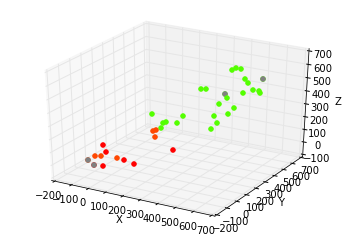

These are the found centers, colored in gray:  [[423.0, 405.0, 438.0], [-88.0, -79.0, 11.0], [552.0, 564.0, 516.0], [-76.0, -45.0, -36.0]]


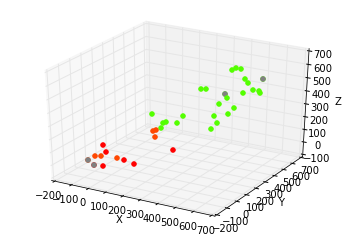

These are the found centers, colored in gray:  [[423.0, 405.0, 438.0], [-88.0, -79.0, 11.0], [552.0, 564.0, 516.0], [-76.0, -45.0, -36.0]]


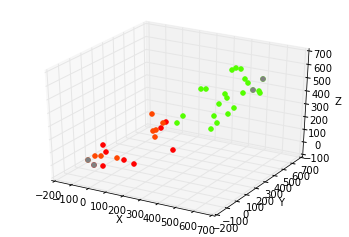

These are the found centers, colored in gray:  [[582.0, 401.0, 507.0], [-76.0, -45.0, -36.0], [552.0, 564.0, 516.0], [-88.0, -79.0, 11.0]]


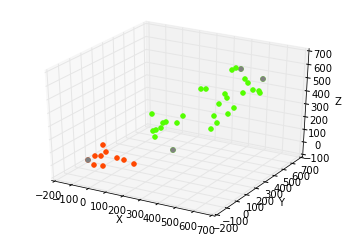

These are the found centers, colored in gray:  [[299.0, 108.0, 109.0], [552.0, 564.0, 516.0], [-88.0, -79.0, 11.0], [417.0, 583.0, 549.0]]


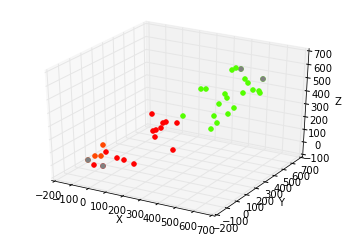

These are the found centers, colored in gray:  [[-32.0, -31.0, -44.0], [552.0, 564.0, 516.0], [-88.0, -79.0, 11.0], [417.0, 583.0, 549.0]]


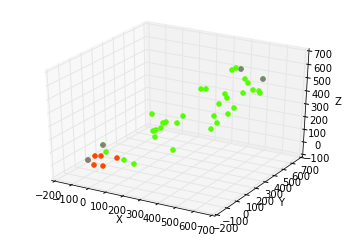

These are the found centers, colored in gray:  [[-83.0, 61.0, 65.0], [552.0, 564.0, 516.0], [-88.0, -79.0, 11.0], [417.0, 583.0, 549.0]]


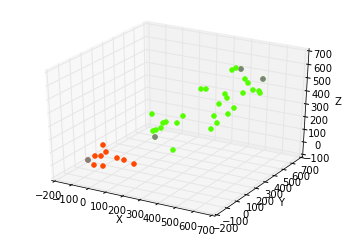

These are the found centers, colored in gray:  [[198.0, 104.0, 185.0], [552.0, 564.0, 516.0], [-88.0, -79.0, 11.0], [417.0, 583.0, 549.0]]


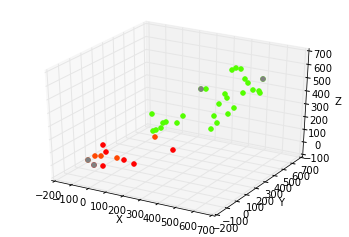

These are the found centers, colored in gray:  [[310.0, 362.0, 463.0], [-76.0, -45.0, -36.0], [552.0, 564.0, 516.0], [-88.0, -79.0, 11.0]]


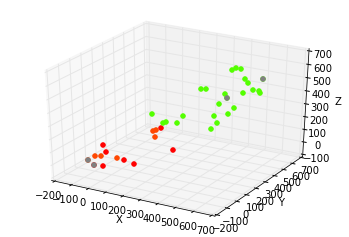

These are the found centers, colored in gray:  [[477.0, 321.0, 460.0], [-76.0, -45.0, -36.0], [552.0, 564.0, 516.0], [-88.0, -79.0, 11.0]]


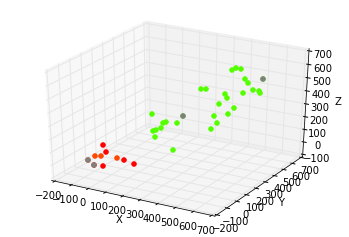

These are the found centers, colored in gray:  [[259.0, 275.0, 286.0], [-88.0, -79.0, 11.0], [552.0, 564.0, 516.0], [-76.0, -45.0, -36.0]]


[None, None, None, None, None, None, None, None, None, None]

In [15]:
map(lambda i: main(4, PointsImmutable), range(10)) #Trying to find different centers using the same dataset.